# Prediction of Concrete Compressive Strength  Using Machine Learning Methods

### Dataset information:

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age(component 8) -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv('Concrete_Data.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [59]:
df = df.rename(columns={"Cement (component 1)(kg in a m^3 mixture)":"Cement",
                        "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":"Blast_Furnace_Slag",
                        "Fly Ash (component 3)(kg in a m^3 mixture)":"Fly_Ash",
                        "Water  (component 4)(kg in a m^3 mixture)":"Water",
                        "Superplasticizer (component 5)(kg in a m^3 mixture)":"Super_Plasticizer",
                        "Coarse Aggregate  (component 6)(kg in a m^3 mixture)":"Coarse_Aggregate",
                        "Fine Aggregate (component 7)(kg in a m^3 mixture)":"Fine_Aggregate",
                        "Age (day)":"Age",
                        "Concrete compressive strength(MPa, megapascals) ":"Concrete_Compressive_Strength"})

In [60]:
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Super_Plasticizer              1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete_Compressive_Strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [62]:
df.shape

(1030, 9)

In [63]:
df.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


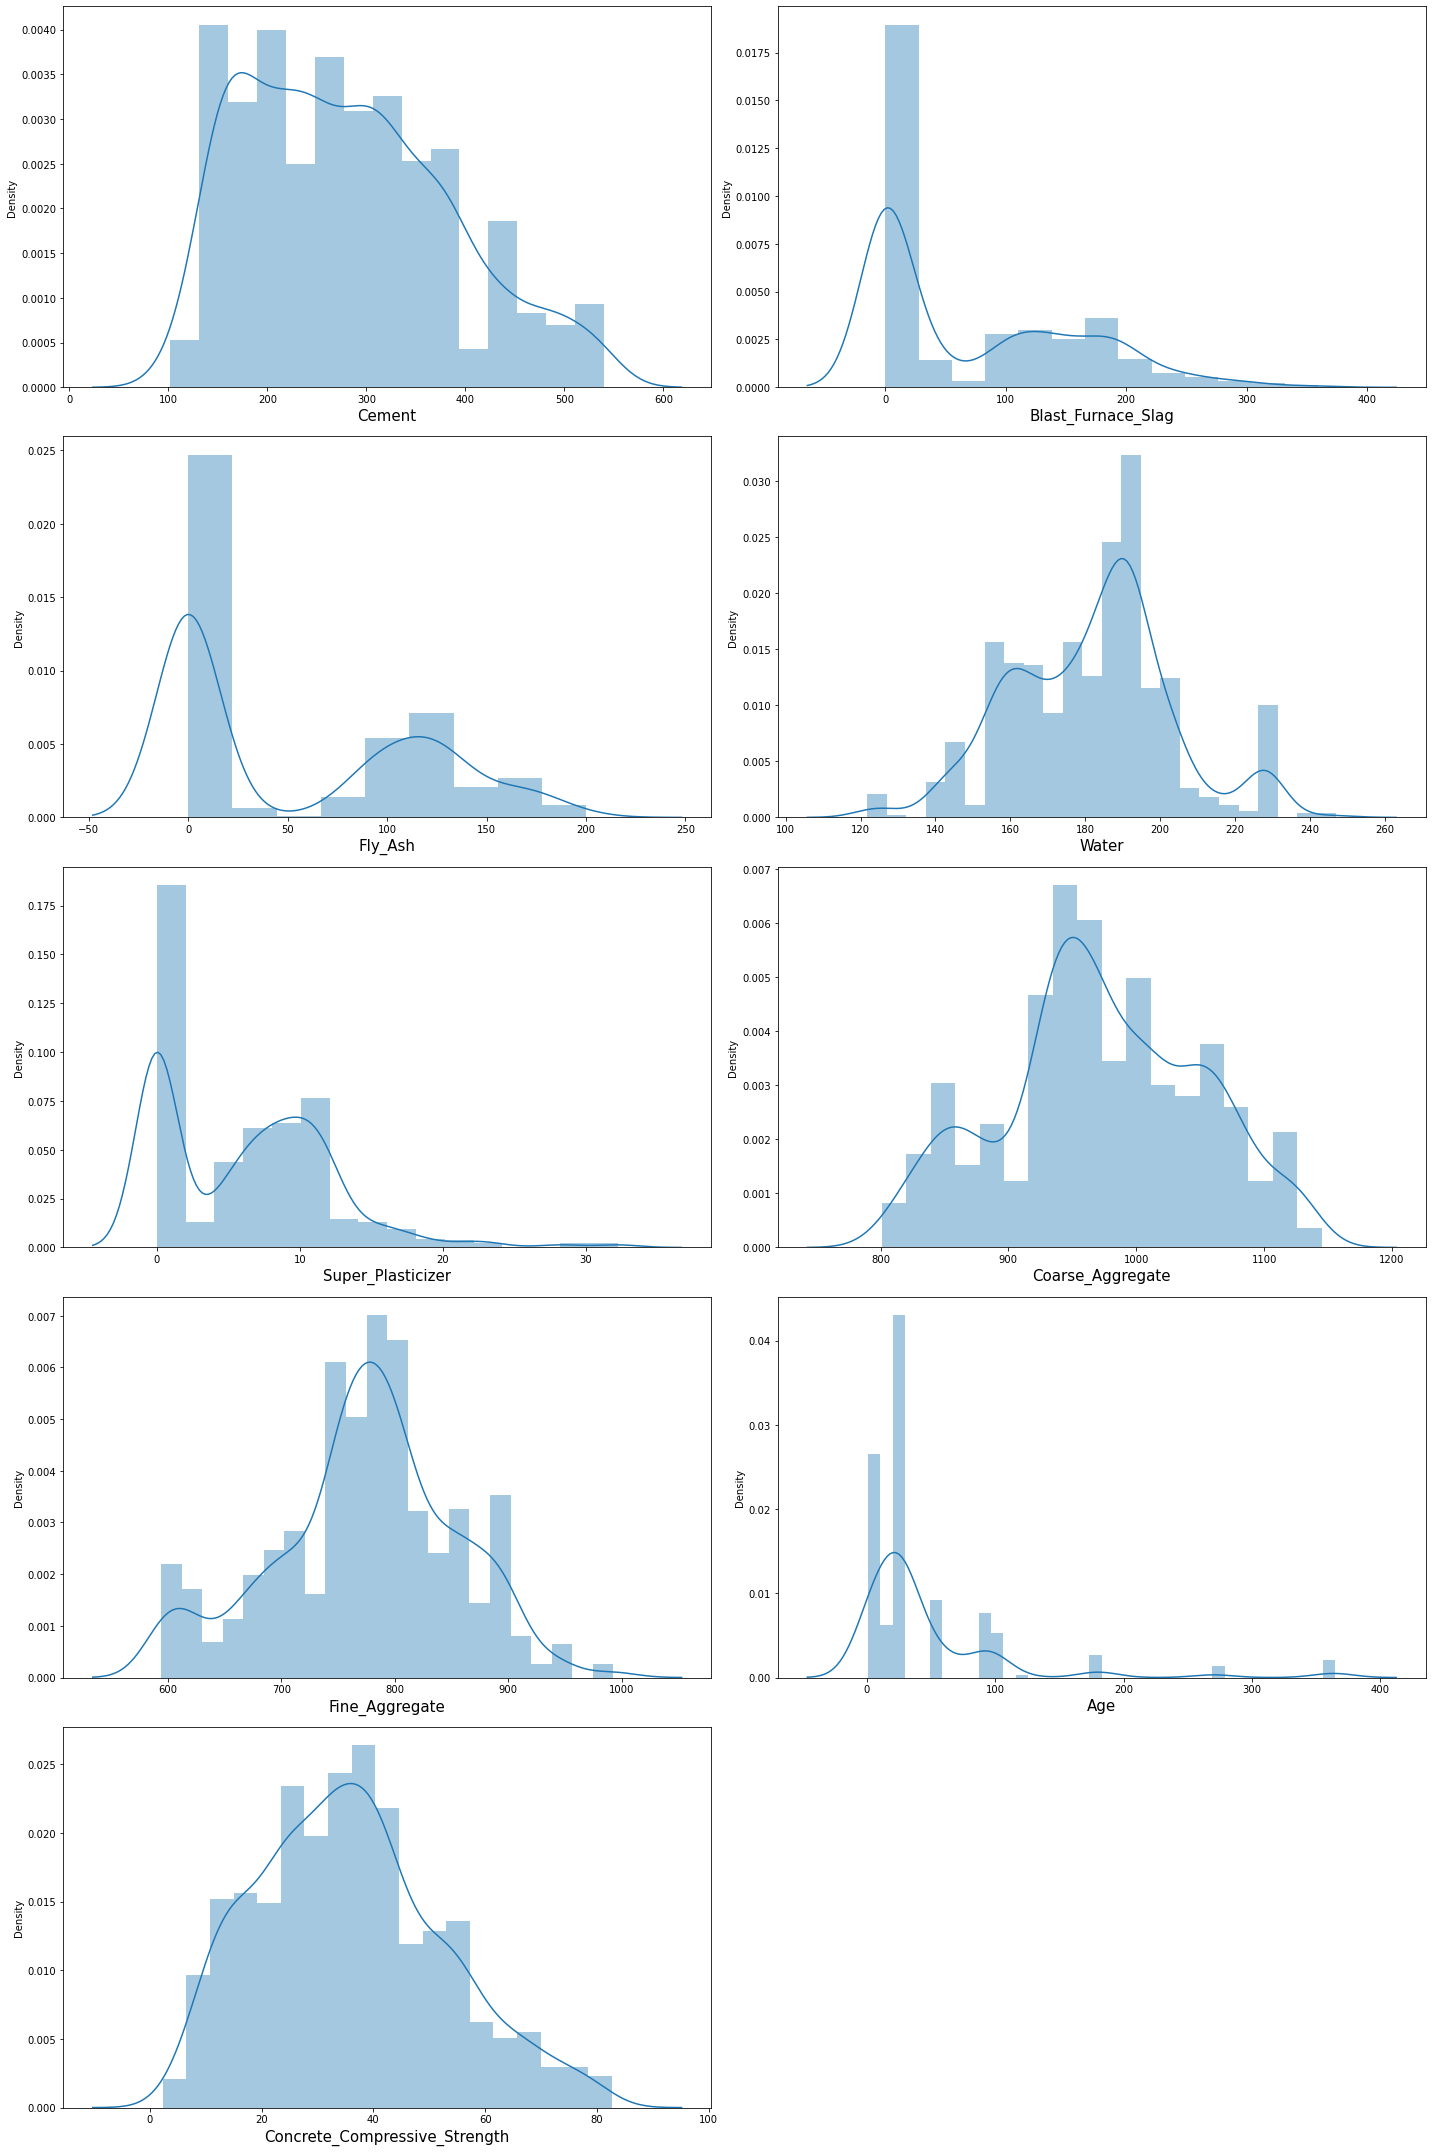

In [64]:
plt.figure(figsize = (20, 30))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 9:
        ax = plt.subplot(5, 2, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

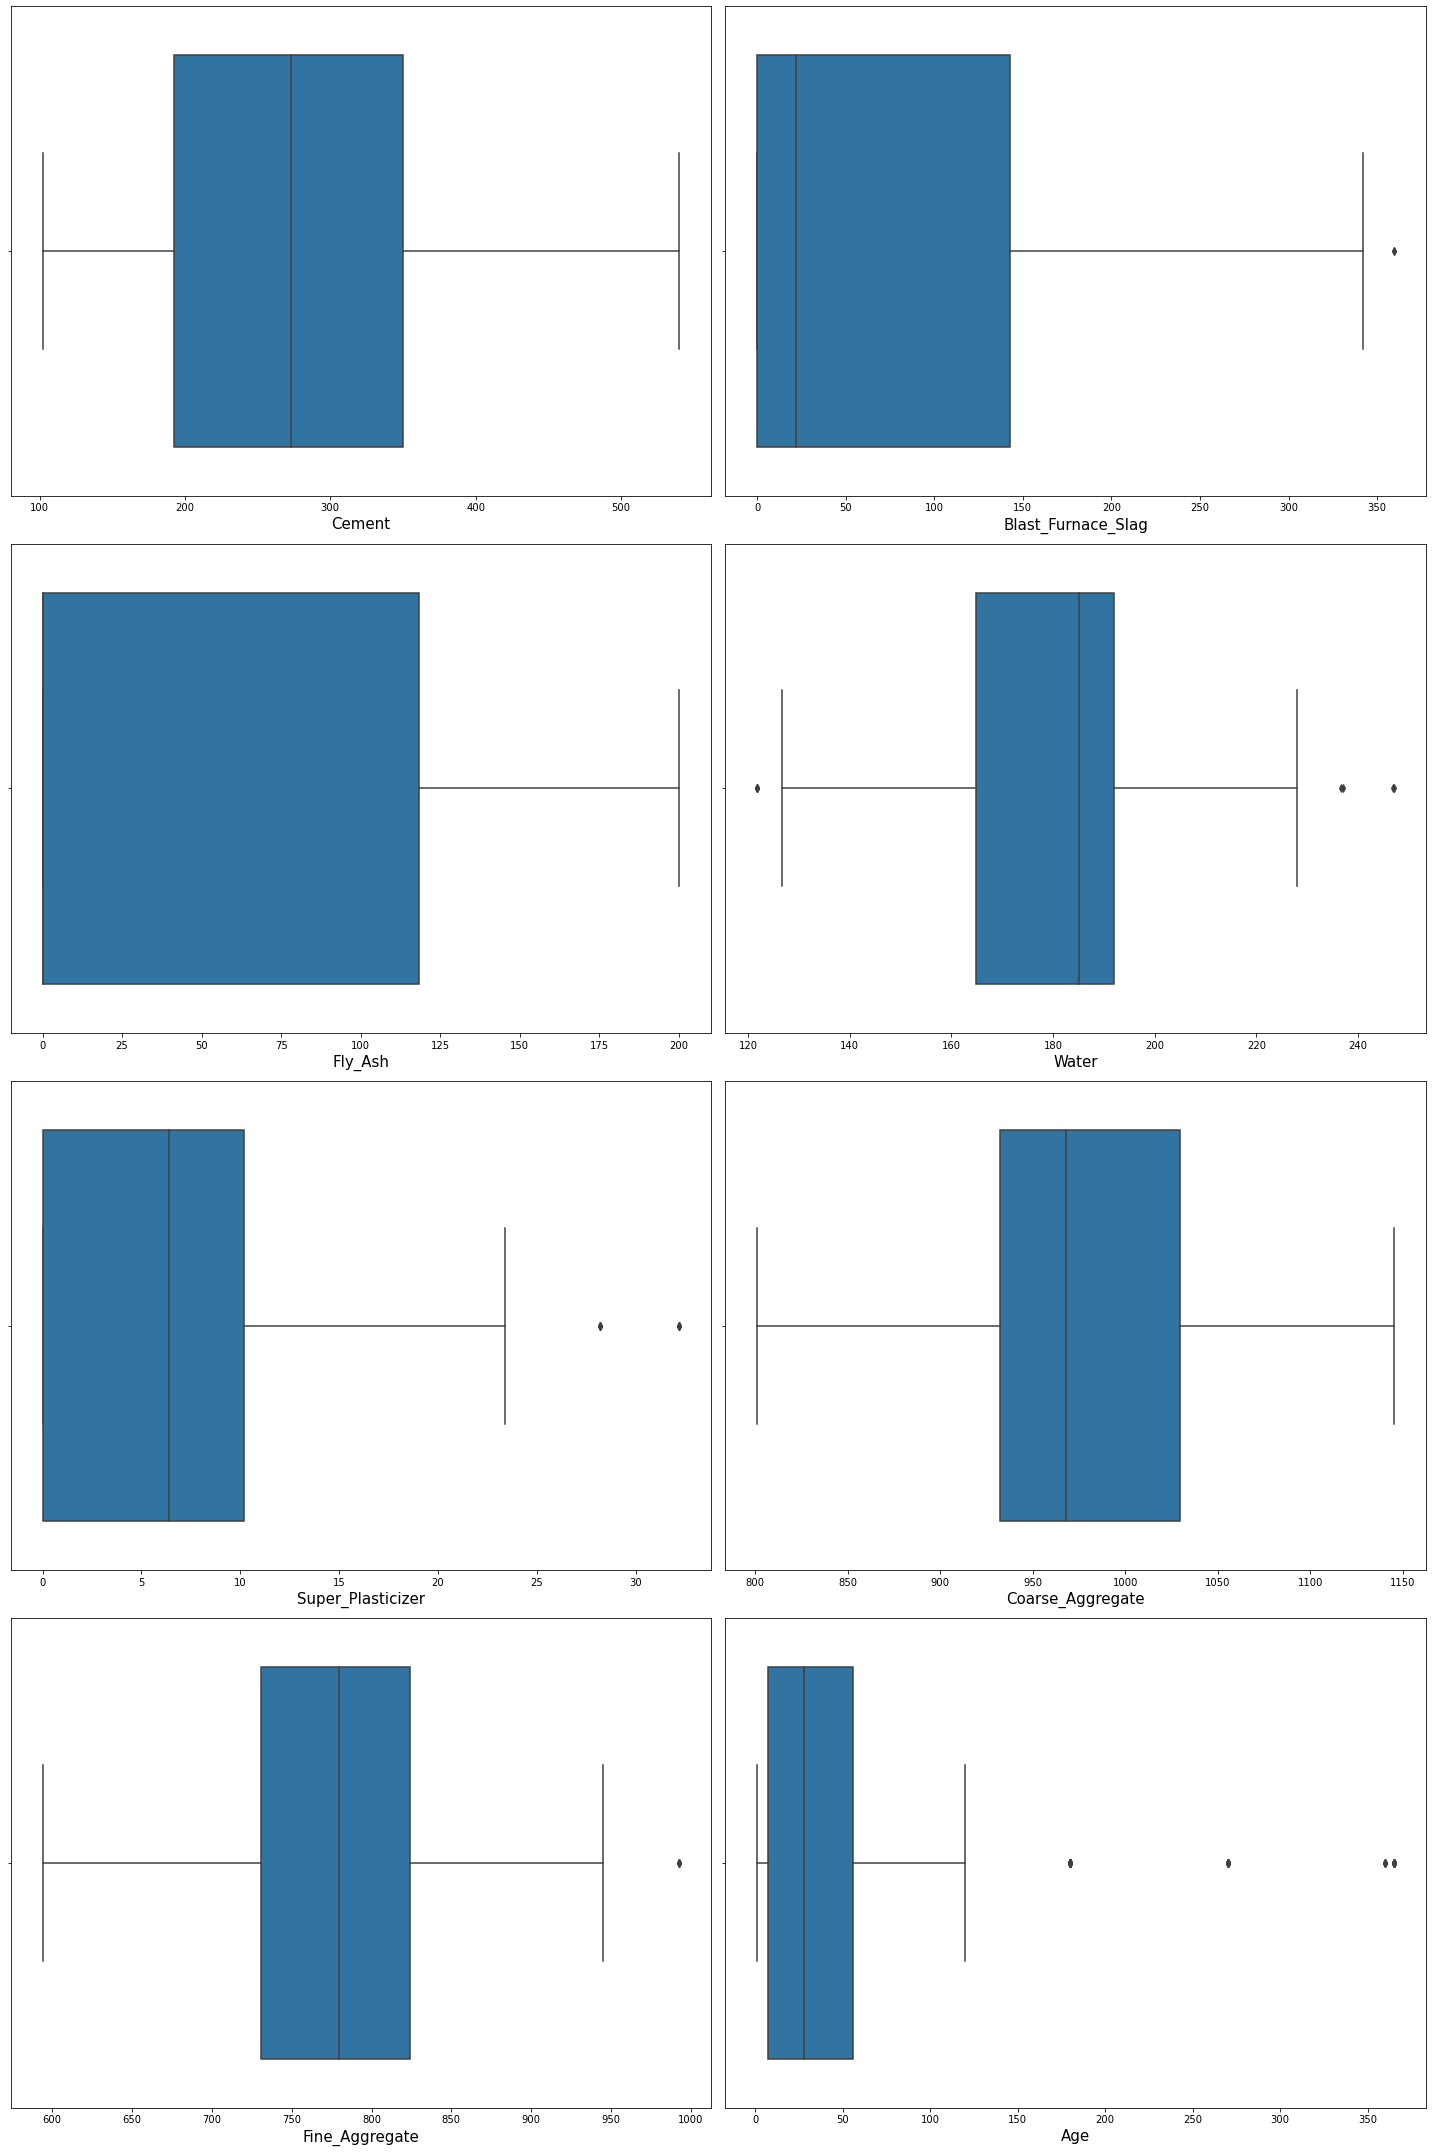

In [65]:
plt.figure(figsize = (20, 30))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

**Observation: Dataset has few outliers, we shall remove the outliers in last section. At this stage we'll proceed without any outlier removal.**

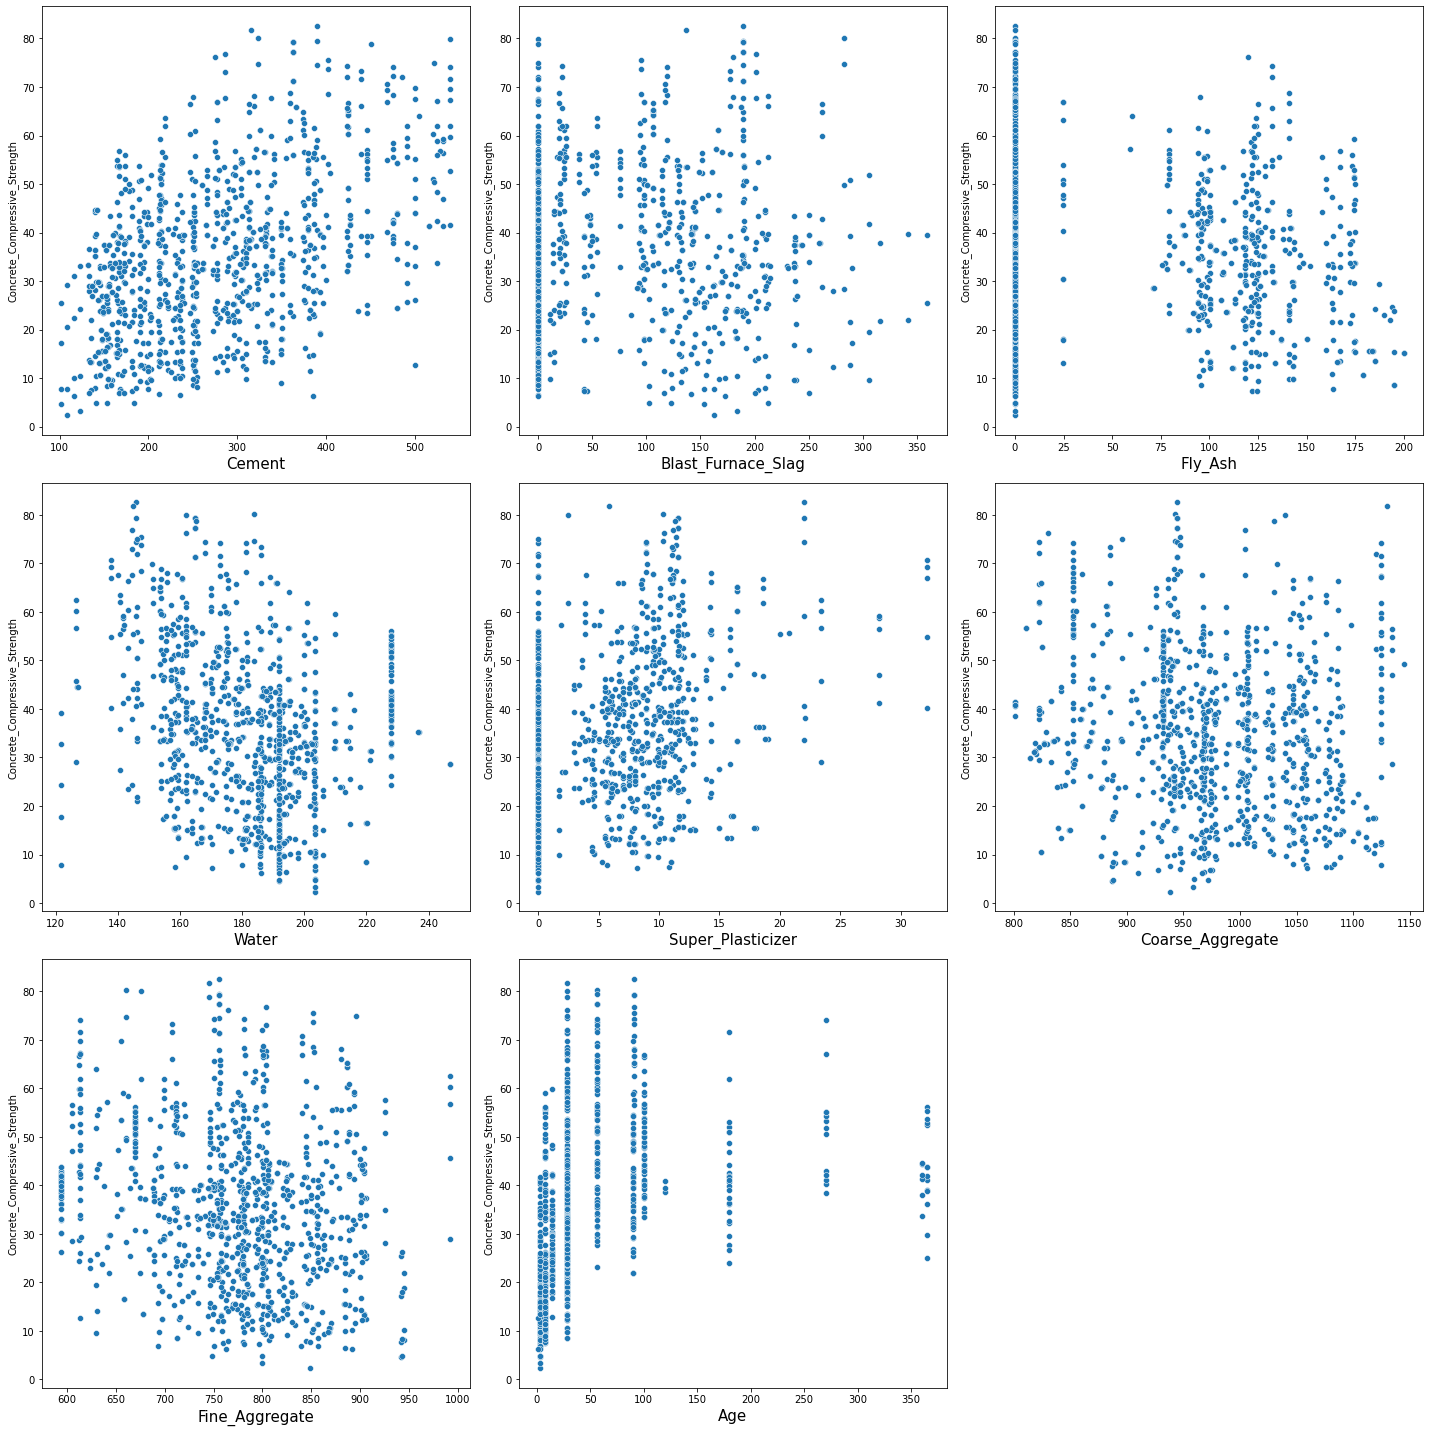

In [66]:
# let's check how our features are related to the target column

plt.figure(figsize = (20, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.scatterplot(df[col], df['Concrete_Compressive_Strength'])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

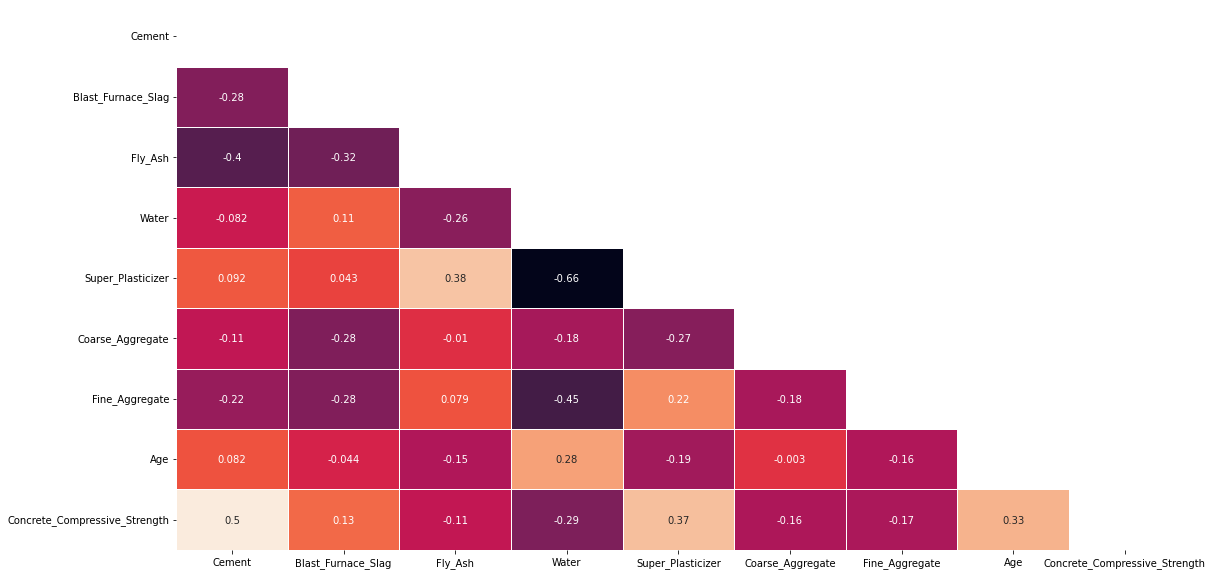

In [67]:
# checking for correlation using heatmap

plt.figure(figsize = (18, 10))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1, cbar = False)
plt.show()

In [68]:
X = df.iloc[:,:-1]
y = df['Concrete_Compressive_Strength']

In [69]:
X.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [70]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Concrete_Compressive_Strength, dtype: float64

In [71]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [72]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso, LassoCV,Ridge
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [74]:
LinearRegression =LinearRegression()
SGD =SGDRegressor()
Lasso =Lasso()
Ridge =Ridge()
RandomForest =RandomForestRegressor()
DecisionTree =DecisionTreeRegressor()
GradientBoosting =GradientBoostingRegressor()
Bagging =BaggingRegressor()
Adboost=AdaBoostRegressor()
KNN =KNeighborsRegressor()
ExtraTree =ExtraTreesRegressor()
XGBoost=XGBRegressor()

In [75]:
algorithms =[LinearRegression,SGD,Lasso,Ridge,RandomForest,DecisionTree,GradientBoosting,Bagging,Adboost,KNN,ExtraTree,XGBoost]

In [76]:
model=[]
accuracy_test=[]
accuracy_train=[]
for i in range(len(algorithms)):
    algorithms[i].fit(X_train,y_train)
    accuracy_train.append(algorithms[i].score(X_train,y_train))
    accuracy_test.append(algorithms[i].score(X_test,y_test))
    model.append(algorithms[i])
    

In [77]:
Results =pd.DataFrame([model,accuracy_train,accuracy_test]).T
Results.columns=['model','score_train','score_test']
Results

,model,score_train,score_test
0,LinearRegression(),0.61779,0.601768
1,SGDRegressor(),0.616698,0.599285
2,Lasso(),0.574469,0.557827
3,Ridge(),0.617766,0.601426
4,"(DecisionTreeRegressor(max_features='auto', ra...",0.983435,0.902344
5,DecisionTreeRegressor(),0.995415,0.852337
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.950965,0.896495
7,(DecisionTreeRegressor(random_state=1781091690...,0.977157,0.887289
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.819579,0.744689
9,KNeighborsRegressor(),0.819313,0.720067


In [78]:
Results.sort_values(by=['score_test'], ascending=False)

,model,score_train,score_test
11,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.994698,0.928229
10,"(ExtraTreeRegressor(random_state=1759092090), ...",0.995415,0.916588
4,"(DecisionTreeRegressor(max_features='auto', ra...",0.983435,0.902344
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.950965,0.896495
7,(DecisionTreeRegressor(random_state=1781091690...,0.977157,0.887289
5,DecisionTreeRegressor(),0.995415,0.852337
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.819579,0.744689
9,KNeighborsRegressor(),0.819313,0.720067
0,LinearRegression(),0.61779,0.601768
3,Ridge(),0.617766,0.601426


In [79]:
# Lets check the diff between training & testing results to verify the overfitting.

Results['score_diff'] = abs(Results['score_train'] - Results['score_test'])
Results.sort_values(by=['score_diff'], ascending=True)

,model,score_train,score_test,score_diff
0,LinearRegression(),0.61779,0.601768,0.016023
3,Ridge(),0.617766,0.601426,0.01634
2,Lasso(),0.574469,0.557827,0.016641
1,SGDRegressor(),0.616698,0.599285,0.017413
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.950965,0.896495,0.05447
11,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.994698,0.928229,0.066469
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.819579,0.744689,0.07489
10,"(ExtraTreeRegressor(random_state=1759092090), ...",0.995415,0.916588,0.078827
4,"(DecisionTreeRegressor(max_features='auto', ra...",0.983435,0.902344,0.081091
7,(DecisionTreeRegressor(random_state=1781091690...,0.977157,0.887289,0.089869


### Voting Regressor

In [80]:
from sklearn.ensemble import VotingRegressor

regressors = [('Decision Tree', DecisionTree), ('Bagging',Bagging), ('Random Forest', RandomForest), ('Gradient Boosting', GradientBoosting), ('Extra Tree', ExtraTree),
              ('XgBoost', XGBoost)]

vr = VotingRegressor(estimators = regressors, n_jobs = -1, verbose = 1, weights = (0.1, 0.1, 0.2, 0.3, 0.8, 0.8))
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('Decision Tree', DecisionTreeRegressor()),
                            ('Bagging', BaggingRegressor()),
                            ('Random Forest', RandomForestRegressor()),
                            ('Gradient Boosting', GradientBoostingRegressor()),
                            ('Extra Tree', ExtraTreesRegressor()),
                            ('XgBoost',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytr...
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, max_cat_to_onehot=4,
                                          max_delta_

In [81]:
vr.score(X_train, y_train)

0.9935078001043852

In [82]:
vr.score(X_test, y_test)

0.9304586763430416

In [83]:
model.append(vr)
accuracy_train.append(vr.score(X_train,y_train))
accuracy_test.append(vr.score(X_test,y_test))
Results =pd.DataFrame([model,accuracy_train,accuracy_test]).T
Results.columns=['model','score_train','score_test']

In [84]:
Results.sort_values(by=['score_test'], ascending=False)

,model,score_train,score_test
12,"VotingRegressor(estimators=[('Decision Tree', ...",0.993508,0.930459
11,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.994698,0.928229
10,"(ExtraTreeRegressor(random_state=1759092090), ...",0.995415,0.916588
4,"(DecisionTreeRegressor(max_features='auto', ra...",0.983435,0.902344
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.950965,0.896495
7,(DecisionTreeRegressor(random_state=1781091690...,0.977157,0.887289
5,DecisionTreeRegressor(),0.995415,0.852337
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.819579,0.744689
9,KNeighborsRegressor(),0.819313,0.720067
0,LinearRegression(),0.61779,0.601768


## Outlier Removal using Z-score

Lets observe boxplot to see if we can spot any outliers

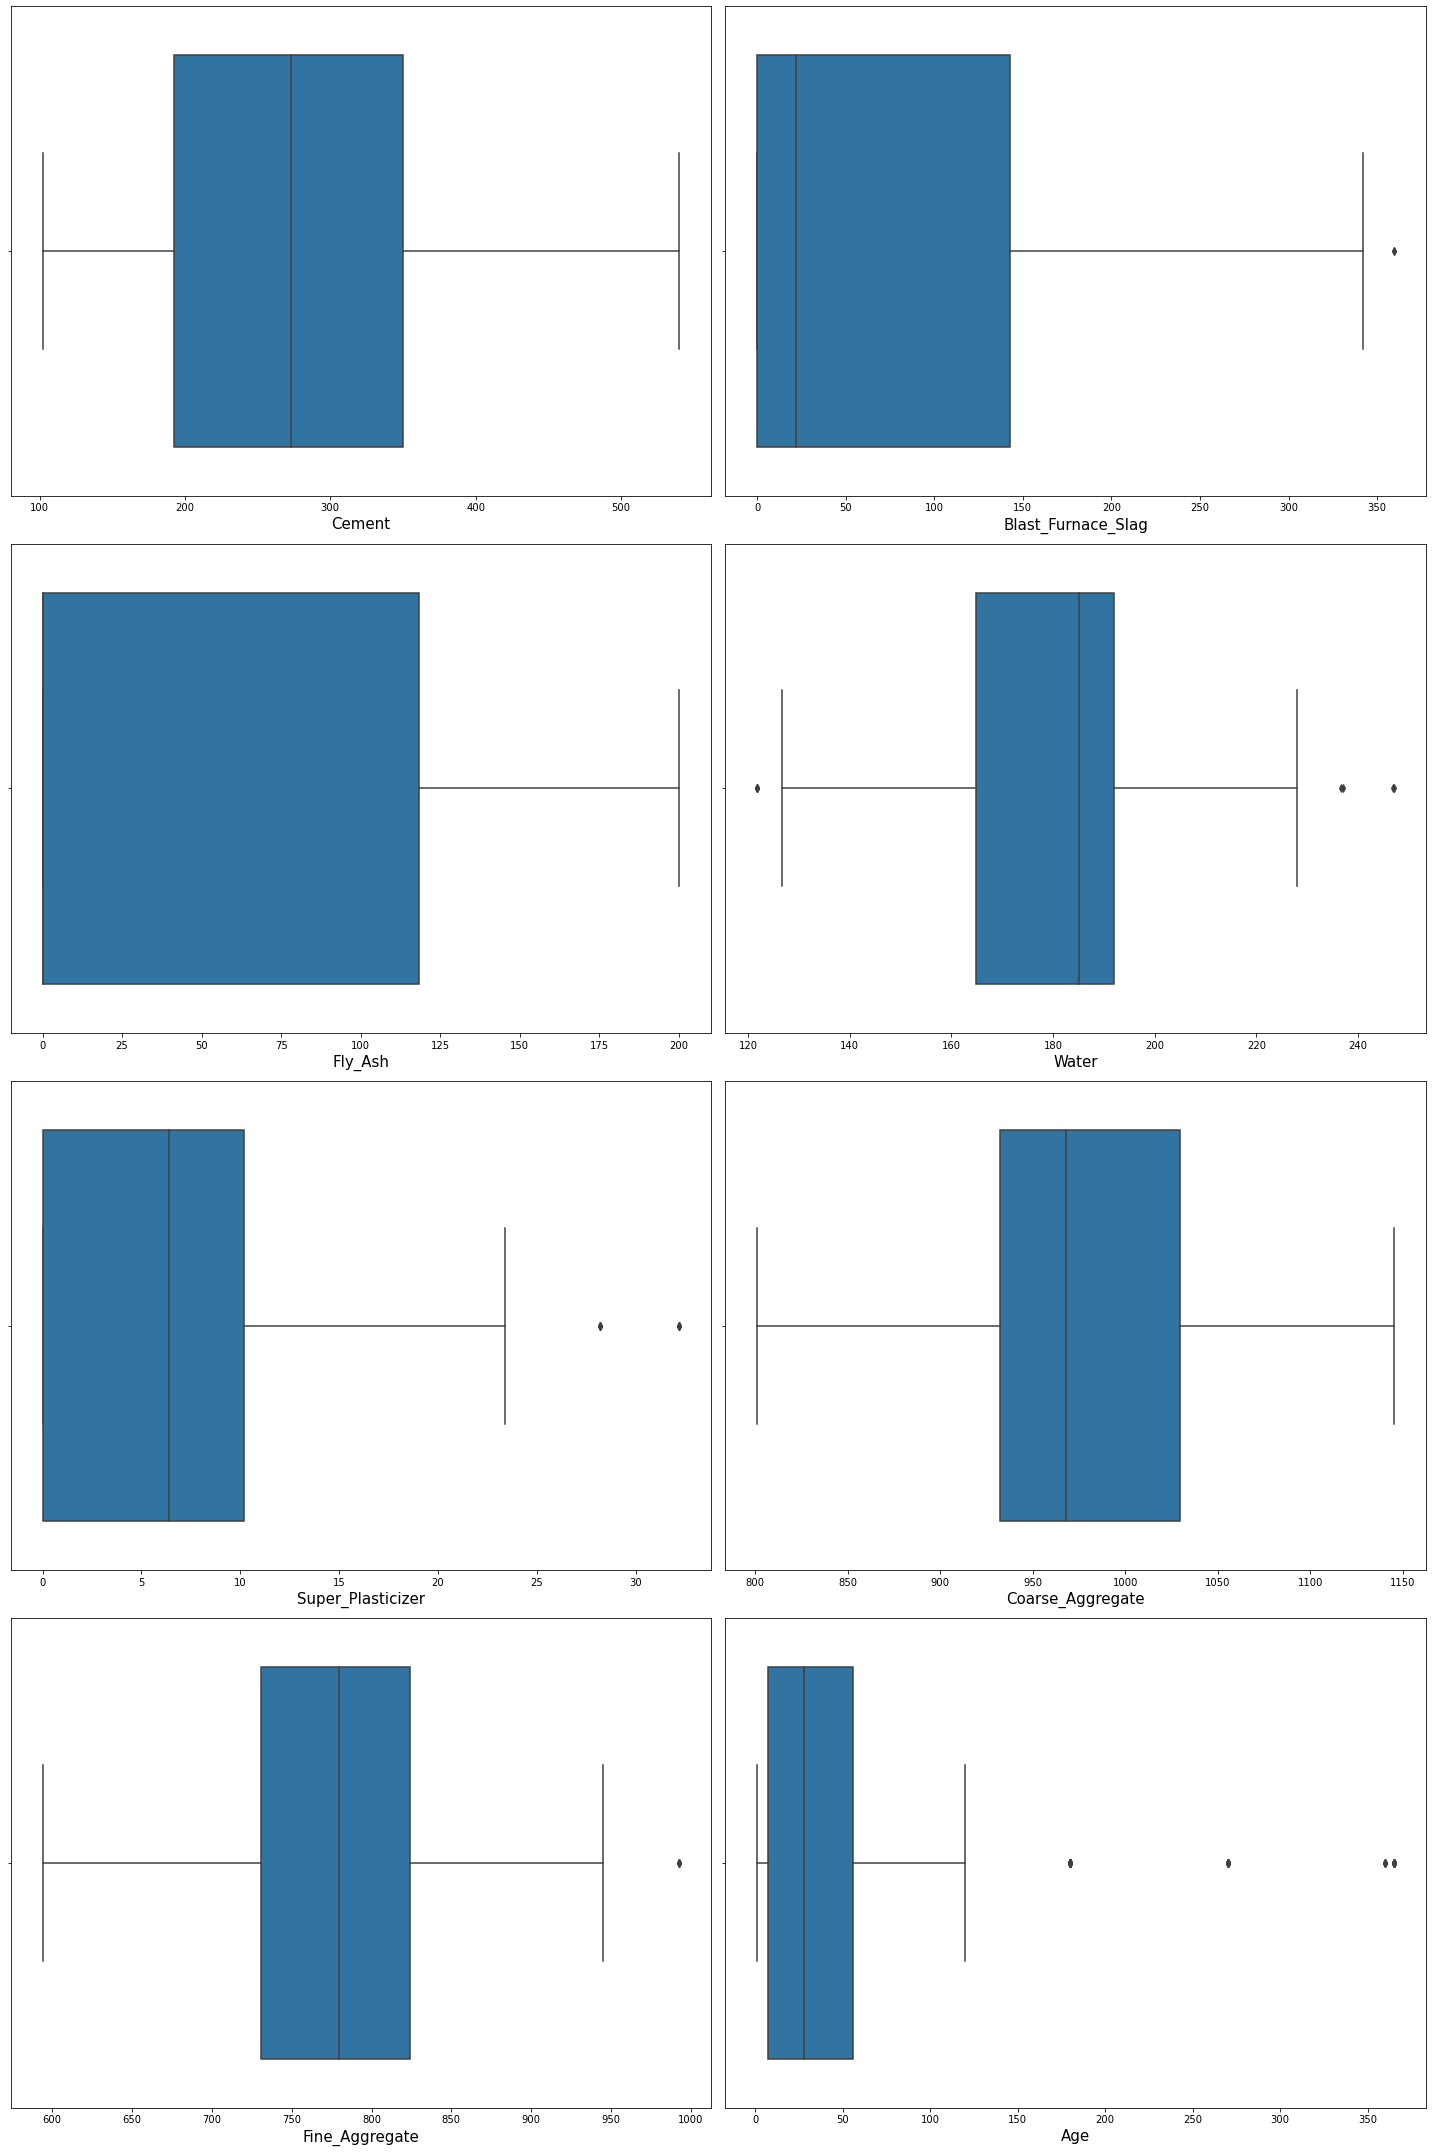

In [85]:
plt.figure(figsize = (20, 30))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

Observation- There seems to be few outliers in Blast_Furnace_Slag, Water, Super_Plasticizer, Fine_Aggregate, Age

**Lets use Z-score to remove outliers. Z score indicates how many standard deviation away a data point is.**

<img align='left' height="400" width="300" src="zscore.png" />

In [86]:
df['zscore_Blast_Furnace_Slag'] = ( df.Blast_Furnace_Slag - df.Blast_Furnace_Slag.mean() ) / df.Blast_Furnace_Slag.std()
df['zscore_Water'] = ( df.Water - df.Water.mean() ) / df.Water.std()
df['zscore_Super_Plasticizer'] = ( df.Super_Plasticizer - df.Super_Plasticizer.mean() ) / df.Super_Plasticizer.std()
df['zscore_Fine_Aggregate'] = ( df.Fine_Aggregate - df.Fine_Aggregate.mean() ) / df.Fine_Aggregate.std()
df['zscore_Age'] = ( df.Age - df.Age.mean() ) / df.Age.std()
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength,zscore_Blast_Furnace_Slag,zscore_Water,zscore_Super_Plasticizer,zscore_Fine_Aggregate,zscore_Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,-0.856472,-0.916319,-0.620147,-1.217079,-0.279597
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,-0.856472,-0.916319,-0.620147,-1.217079,-0.279597
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.795140,2.174405,-1.038638,-2.239829,3.551340
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.795140,2.174405,-1.038638,-2.239829,5.055221
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.678079,0.488555,-1.038638,0.647569,4.976069


In [87]:
df[(df.zscore_Blast_Furnace_Slag<-3) | (df.zscore_Blast_Furnace_Slag>3)].shape #check for no. of outliers in Blast_Furnace_Slag

(4, 14)

4 outliers in Blast_Furnace_Slag column

In [88]:
df[(df.zscore_Water<-3) | (df.zscore_Water>3)].shape #check for no. of outliers in Water

(2, 14)

2 outliers in Water column

In [89]:
df[(df.zscore_Super_Plasticizer<-3) | (df.zscore_Super_Plasticizer>3)].shape #check for no. of outliers in Super_Plasticizer

(10, 14)

10 outliers in Water column

In [90]:
df[(df.zscore_Fine_Aggregate<-3) | (df.zscore_Fine_Aggregate>3)].shape #check for no. of outliers in Fine_Aggregate

(0, 14)

No outliers in Fine_Aggregate column( No data point beyond 3 std dev)

In [91]:
df[(df.zscore_Age<-3) | (df.zscore_Age>3)].shape #check for no. of outliers in Fine_Aggregate

(33, 14)

33 outliers in Age column

**As age column has more outliers, lets remove outliers from this column to check the model performance**

In [125]:
df_no_outliers = df[(df.zscore_Age>-3) & (df.zscore_Age<3)
                   ]
df_no_outliers.shape

(997, 15)

In [126]:
df.shape

(1030, 15)

In [127]:
print ("number of outliers removed = {}" .format(df.shape[0]-df_no_outliers.shape[0]))

number of outliers removed = 33


In [132]:
X = df_no_outliers.iloc[:,:-7]
y = df_no_outliers['Concrete_Compressive_Strength']

In [133]:
X.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28


In [134]:
X.shape

(997, 8)

In [135]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [136]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [137]:
model=[]
accuracy_test=[]
accuracy_train=[]
for i in range(len(algorithms)):
    algorithms[i].fit(X_train,y_train)
    accuracy_train.append(algorithms[i].score(X_train,y_train))
    accuracy_test.append(algorithms[i].score(X_test,y_test))
    model.append(algorithms[i])

In [138]:
Results =pd.DataFrame([model,accuracy_train,accuracy_test]).T
Results.columns=['model','score_train','score_test']

In [139]:
Results.sort_values(by=['score_test'], ascending=False)

,model,score_train,score_test
11,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.994629,0.93033
10,"(ExtraTreeRegressor(random_state=111960513), E...",0.995311,0.920961
7,(DecisionTreeRegressor(random_state=1834767367...,0.978529,0.913063
4,"(DecisionTreeRegressor(max_features='auto', ra...",0.981584,0.90892
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.947752,0.905858
5,DecisionTreeRegressor(),0.995311,0.833691
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.81356,0.78575
9,KNeighborsRegressor(),0.851671,0.74761
0,LinearRegression(),0.708019,0.675575
3,Ridge(),0.707995,0.675435


### Scores improve marginally by removing outliers

In [140]:
### Create a Pickle file using serialization, XGBoost model shows best performance, hence it is used for deployment.
import pickle
pickle_out = open("XGBoost.pkl","wb")
pickle.dump(XGBoost, pickle_out)
pickle_out.close()

In [141]:
### Create a Pickle file using serialization for Standard scaler object.
pickle_out = open("sc.pkl","wb")
pickle.dump(sc, pickle_out)
pickle_out.close()

In [144]:
XGBoost.predict(sc.transform([[5,4,2,4,5,6,8,20]]))

array([13.177322], dtype=float32)